MAIN STATISTICAL TESTS [COMPLETE]

Hello! This is a data analysis project to analyze what factors contribute to forest fires. We will be using a chi squared test for goodness of fit.

In [1]:
import pandas as pd
import math
import random
from scipy.stats import chisquare

Here we will import the fire dataset of forest fires from Portugal in Kaggle.
- Here is the link: https://www.kaggle.com/datasets/ishandutta/forest-fires-data-set-portugal
LETS CHECK CONDITIONS:
- Random sample? It seems that this dataset was collected by convenience but this is because forest fires are not a very rare occurance. There is nothing to suggest a bias in sample that doesn't match population. PROCEED WITH CAUTION.
- Normal? Should be. The time period is unspecified but given portugal gets thousands of fires a year, 517 of all fires should not be an issue.
- Large counts? Yes, the number of 

In [ ]:
fire_data = pd.read_csv("../DATASETS/forestfires.csv")
fire_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Then we will group it by month to see what proportion of data is necessary from each month (stratified).

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64
Number of values in dataset: 517


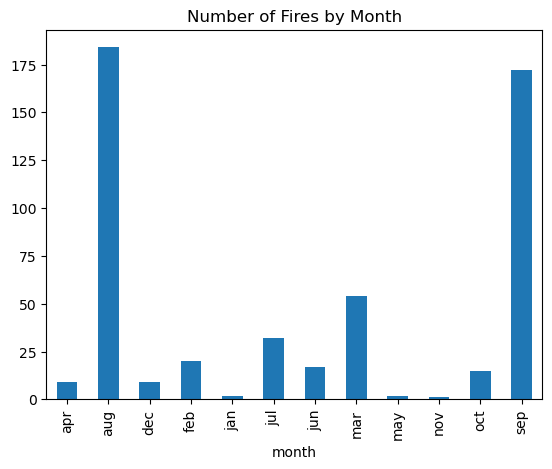

In [ ]:
grouped = fire_data.groupby("month").size().plot(kind="bar", title="Number of Fires by Month")
counts = fire_data.value_counts("month")
num_data = sum(counts)
print(counts)
print("Number of values in dataset:", num_data)

We will conduct a stratified simple random sample by grabbing 20% of each strata.

In [7]:
proportions = {}
for mon in fire_data["month"].unique():
    proportions[mon] = math.ceil(0.2 * float(counts[mon]))

observed = []
new_df = pd.DataFrame()

for mon, prop in proportions.items():
    print(mon, prop)
    month_data = fire_data[fire_data["month"] == mon]
    sampled_data = month_data.sample(n=prop, random_state=42)
    observed.append((mon,sum(sampled_data["area"])/len(sampled_data)))
    new_df = pd.concat([new_df, sampled_data], ignore_index=True)

print("New number of values in dataset:", len(new_df))
print("OBSERVED VALUES:", observed)

mar 11
oct 3
aug 37
sep 35
apr 2
jun 4
jul 7
feb 4
jan 1
dec 2
may 1
nov 1
New number of values in dataset: 108
OBSERVED VALUES: [('mar', 3.5772727272727276), ('oct', 2.276666666666667), ('aug', 25.442432432432433), ('sep', 10.791714285714285), ('apr', 32.870000000000005), ('jun', 2.8175), ('jul', 52.53285714285714), ('feb', 1.3475), ('jan', 0.0), ('dec', 10.23), ('may', 38.48), ('nov', 0.0)]


Conduct X^2 Goodness of Fit Test ->
Remove jan feb and nov due to undercoverage (and it is given that fires will subside in the winter)

In [ ]:
excluded_months = ["jan", "feb", "nov"]
included = []
for mon, val in observed:
    if mon in excluded_months:
        print(f"Excluding {mon} from observed data.")
        continue
    included.append((mon, val))
observed = [x[1] for x in included]
print(observed)

exp = sum(observed)/9

expected = [exp]*9
print(sum(expected), sum(observed))
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The observed data does not fit the expected distribution (reject null hypothesis).")
else:
    print("The observed data fits the expected distribution (fail to reject null hypothesis).")

Excluding feb from observed data.
Excluding jan from observed data.
Excluding nov from observed data.
[3.5772727272727276, 2.276666666666667, 25.442432432432433, 10.791714285714285, 32.870000000000005, 2.8175, 52.53285714285714, 10.23, 38.48]
179.01844325494326 179.01844325494326
Chi-squared Statistic: 133.44535804252422
P-value: 5.458164270329626e-25
The observed data does not fit the expected distribution (reject null hypothesis).


This shows us which months were farthest from our expected values.

[('jul', 7.318937683921878), ('may', 4.168020432431398), ('oct', 3.949453928961532), ('jun', 3.8281888322728292), ('mar', 3.657833368665741), ('apr', 2.910151971863836), ('dec', 2.1661656657920694), ('sep', 2.040218663323222), ('aug', 1.2447503707982783)]


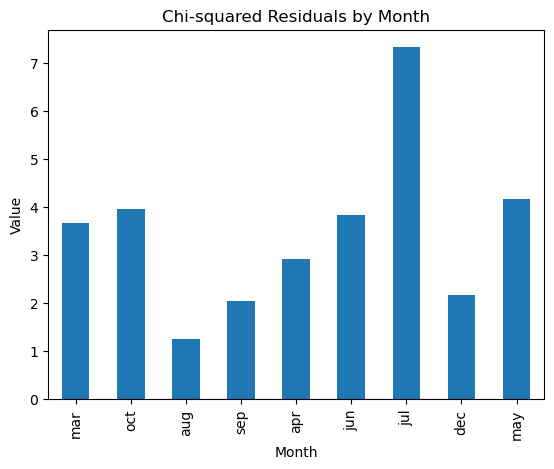

In [14]:
x_vals = []
for mon, val in included:
    resid = val - exp
    x = math.sqrt(resid**2/exp)
    x_vals.append((mon, x))
ordered = sorted(x_vals, key=lambda x: x[1], reverse=True)
print(ordered)

points = pd.DataFrame(x_vals, columns=["month", "value"])
points.plot(x="month", y="value", kind="bar", title="Chi-squared Residuals by Month", legend=False)
import matplotlib.pyplot as plt
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()